In [6]:
%pylab inline
import pandas as pd
import scipy.io.wavfile as wavefile
import scipy.signal
import soundfile
import io
import hashlib
import librosa

Populating the interactive namespace from numpy and matplotlib


In [10]:
traininfo=pd.read_csv("../info/train_info.csv")
traininfo.shape

(64721, 11)

In [11]:
traininfo=traininfo.groupby("sha256").first().reset_index()
traininfo.shape

(64300, 11)

In [13]:
traininfo=traininfo[traininfo['clear']==1]
traininfo.shape

(64133, 11)

In [22]:
traininfo['label'].value_counts()

unknown    40747
no          2354
stop        2354
yes         2349
on          2343
down        2343
go          2339
right       2338
left        2331
off         2325
up          2310
Name: label, dtype: int64

In [21]:
traininfo.head()

sha256    label  \
0  000066f4dd45cff5cf15f2364795988fc8cfd28bf0347b...  unknown   
1  0000a8a532b53b630c163e344c74c568e1f187babb87ea...  unknown   
2  00025f449b61c01ff680d038bbff5cbc3e0b479171ffc3...     stop   
3  000303f8c9739bfa452471a56473d3fd76c5941ae485a0...      yes   
4  00031ab8987fd03890b22b05f8c3b1e741c1e6d421a64f...     down   

                                     path  target   subject  subject_id  \
0  train/audio/tree/1ba20be2_nohash_0.wav       9  1ba20be2        1105   
1  train/audio/four/e5d2e09d_nohash_0.wav       9  e5d2e09d         866   
2  train/audio/stop/e5d2e09d_nohash_0.wav       8  e5d2e09d         866   
3   train/audio/yes/712e4d58_nohash_4.wav      11  712e4d58         918   
4  train/audio/down/f5733968_nohash_3.wav       0  f5733968        1648   

      id  fold  compress_ratio  compress_ratio2  clear  
0  41019     5        3.003567         8.908686      1  
1  24780     6        2.257655         9.908655      1  
2  10419     6        2.212389         9.360831      1  
3    172     8        3.916769        21.304927      1  
4  51515     8        3.017160        19.347037      1

In [78]:
def normalize_wav(arr,trunc=False):
    if len(arr)>16000 and trunc:
        arr=arr[:16000]
    arr-=np.mean(arr)
    if len(arr)<16000:
        m=(16000-len(arr))
        arr=np.concatenate([np.zeros([int(m/2)]), arr, np.zeros(m-int(m/2))])
    assert len(arr)==16000
    max_v=np.max(np.abs(arr))+1e-8
    arr=arr/max_v
    return arr.astype(np.float32)
def read_file(fname,trunc=False):
    arr=wavefile.read(fname)[1].astype(np.float32)
    return normalize_wav(arr,trunc=trunc)

In [79]:
w=read_file("../input/train/audio/stop/e5d2e09d_nohash_0.wav")
ipd.Audio(w,rate=16000)

In [68]:
y=read_file("../input/train/audio/tree/1ba20be2_nohash_0.wav")

In [69]:
fname='../input/train/audio/_background_noise_/doing_the_dishes.wav'

In [70]:
x=read_file(fname,True)

In [71]:
import IPython.display as ipd
ipd.Audio(x,rate=16000)

In [72]:
ipd.Audio(y,rate=16000)

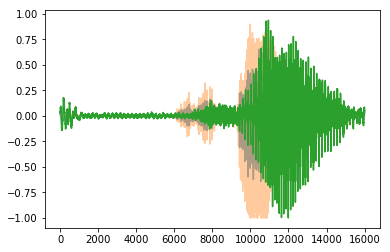

In [73]:
z=(w+y+x*0.0)/2
plt.plot(z,alpha=0.6)#;plt.show()
plt.plot(w,alpha=0.4)#;plt.show()
plt.plot(y)

In [57]:
ipd.Audio(z ,rate=16000)

In [34]:
ipd.Audio(wavefile.read(fname)[1][:16000],rate=16000)

In [3]:
files=!ls ../input/train/audio/_background_noise_/*.wav

In [12]:
for fname in files:
    x=wavefile.read(fname)[1]
    print fname, len(x)/16000.,np.abs(x).max()/2.**16

../input/train/audio/_background_noise_/doing_the_dishes.wav 95.183125 0.469955444336
../input/train/audio/_background_noise_/dude_miaowing.wav 61.8056875 0.4169921875
../input/train/audio/_background_noise_/exercise_bike.wav 61.253875 0.125747680664
../input/train/audio/_background_noise_/pink_noise.wav 60.0 0.499984741211
../input/train/audio/_background_noise_/running_tap.wav 61.1555 0.438583374023
../input/train/audio/_background_noise_/white_noise.wav 60.0 0.499984741211


In [11]:
2.**16

65536.0